In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import randn, gamma
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [31]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Average salary in USD (2017): 51272 (USD/year)

mu_1 = 51272
sigma_1 = 25281

# Create n random salary samples; negative values are excluded
def salary_generator(n, mu, sigma): 
    return np.around(list(map(abs, sigma*randn(n) + mu)), decimals=2)


# Generate work experience (years)
def exp_generator(n, k=1, theta = 9):
    return np.around(gamma(k, theta, n), decimals=2)

In [33]:
X_exp = exp_generator(100)

In [34]:
X_exp

array([  4.55000000e+00,   4.70000000e+00,   2.45000000e+00,
         2.19400000e+01,   6.94000000e+00,   5.30000000e-01,
         8.76000000e+00,   8.16000000e+00,   6.91000000e+00,
         2.69000000e+00,   3.41700000e+01,   2.81500000e+01,
         1.47500000e+01,   8.59000000e+00,   7.02000000e+00,
         6.01000000e+00,   6.58000000e+00,   8.19000000e+00,
         1.98000000e+00,   3.42500000e+01,   2.00000000e-02,
         3.36000000e+00,   1.36400000e+01,   7.29000000e+00,
         3.90000000e-01,   1.01400000e+01,   8.20000000e+00,
         5.62000000e+00,   1.03600000e+01,   4.56000000e+00,
         5.70000000e-01,   1.36800000e+01,   9.90000000e-01,
         3.00000000e-02,   1.01100000e+01,   5.00000000e-01,
         3.94000000e+00,   8.02000000e+00,   1.06000000e+01,
         2.06800000e+01,   7.37000000e+00,   5.05000000e+00,
         1.96000000e+00,   2.14400000e+01,   1.02000000e+00,
         1.74400000e+01,   2.67000000e+01,   1.34800000e+01,
         7.68000000e+00,

In [35]:
Y_salary = salary_generator(100, mu_1, sigma_1)

In [36]:
Y_salary

array([  29189.23,   34827.01,   69974.83,   40336.78,   41344.86,
         84526.48,   52845.67,   80988.12,   48093.56,   56596.45,
         34105.16,   51308.58,   25209.24,   47368.52,   43424.56,
         60946.26,   15780.18,   89021.28,   19185.52,   71021.29,
         62966.21,   23913.6 ,   46007.53,   65897.31,   35337.19,
         59890.25,   65509.69,   86480.59,   43678.67,   48352.08,
         38036.97,   39492.31,   28209.41,   26862.95,   30503.67,
         42605.88,   71595.24,   75409.77,   55414.31,   23508.89,
         71005.61,   13235.  ,   57954.33,   57401.72,    1064.09,
         33552.84,   55246.  ,   18767.66,   30592.11,   62721.8 ,
         55596.95,   78836.68,   49369.85,   67865.49,   50510.29,
         56749.63,   21795.19,   45562.55,   36739.43,   19201.99,
         74826.81,    3655.09,  123740.17,   54057.52,   51814.41,
         36879.16,   36758.74,   30068.63,   58763.2 ,   76736.17,
         98384.76,   44906.09,   66126.7 ,   68608.87,   10061

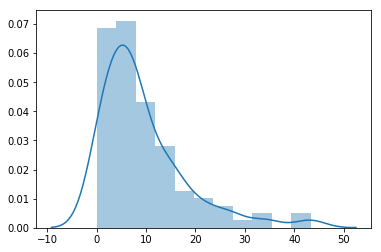

In [37]:
# Gamma distribution
sns.distplot(X_exp)

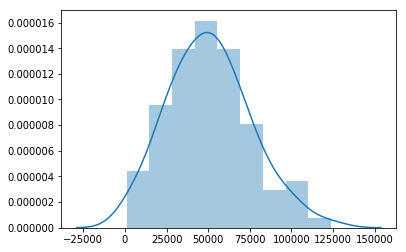

In [38]:
# Normal distribution
sns.distplot(Y_salary)

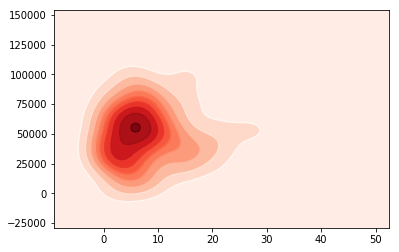

In [39]:
sns.kdeplot(X_exp, Y_salary, shade = True, cmap = 'Reds')
sns.kdeplot(X_exp, Y_salary, cmap = 'Reds')

In [40]:
lin_model = LinearRegression()

In [41]:
lin_model.fit(X_exp.reshape(-1,1), Y_salary.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
exp_data = exp_generator(100)

In [43]:
exp_data

array([  1.53,  17.32,   8.26,   1.07,  20.32,  10.55,   3.1 ,  26.81,
         0.52,   1.73,   5.  ,   1.37,   0.04,  10.7 ,   0.2 ,   8.69,
        11.57,  25.9 ,   0.99,  16.19,  10.13,  14.67,   6.48,   6.43,
         2.18,   5.26,  11.57,   0.95,  10.47,   6.6 ,   9.62,  27.83,
        11.35,   0.32,   0.04,  19.39,  17.91,  15.96,  16.  ,  21.32,
         5.67,   5.2 ,  11.15,   3.68,  14.3 ,  21.93,   1.87,   7.31,
         2.37,  13.61,   4.51,   2.94,   8.14,   5.63,   3.81,   4.71,
         4.39,  18.29,  10.81,   4.76,   0.16,   8.77,   4.28,   4.18,
         0.19,  17.95,  20.96,   0.26,   2.55,  29.87,   3.32,  26.28,
         1.39,   8.45,   3.71,   0.58,   2.52,   1.14,   0.59,   6.14,
         6.41,   4.74,   4.29,   6.25,  16.22,   2.77,   9.39,   7.28,
         3.96,   8.11,   4.33,   6.83,  10.1 ,   7.09,   5.19,   2.09,
         0.05,  16.13,  29.71,   8.92])

In [44]:
predicted_salary = lin_model.predict(exp_data.reshape(-1,1))

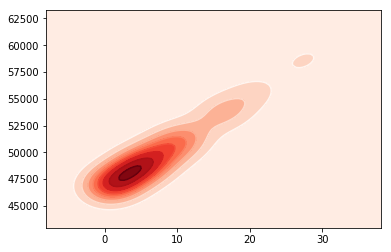

In [45]:
sns.kdeplot(exp_data, predicted_salary.reshape(1,-1)[0], shade = True, cmap = 'Reds')
sns.kdeplot(exp_data, predicted_salary.reshape(1,-1)[0], cmap = 'Reds')

In [47]:
print('Regression model: Y = ' + str(lin_model.coef_[0,0]) + '*X + ' + str(lin_model.intercept_[0]))

Regression model: Y = 440.260787793*X + 46520.1950462


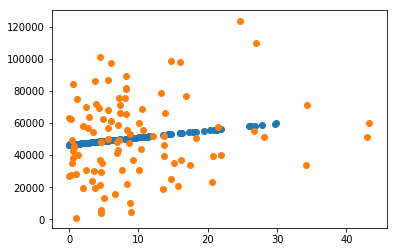

In [48]:
plt.scatter(exp_data, predicted_salary)
plt.scatter(X_exp, Y_salary)

In [53]:
# K-fold cross-validation
cv_scores = cross_val_score(estimator = lin_model, X = X_exp.reshape(-1,1), y = Y_salary.reshape(-1,1), cv = 10)

In [54]:
cv_scores

array([-0.21751987, -0.12218735, -0.07345013, -0.22214466, -0.23573875,
        0.00794142,  0.05854406,  0.01416911, -0.19176281, -0.08667258])

In [55]:
cv_scores.std()

0.10310139173688558